# OE plot

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.stats import norm

%run _color_tools.ipynb

The color palette is saved in the global variable, C
C = color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')


## Load data

In [2]:
oe = pd.read_csv("../outputs/expected_variants_all_regions_stats.tsv", sep="\t")

## Expected variants per transcript

In [3]:
def plot_oe(df, ax, csq="synonymous", ylabel=None):
    sns.regplot(
        ax=ax,
        data=df[
            (df["region"] == "transcript")
            & (df.enst != "ENST00000589042")  # Exclude TTN
            & (df["csq"] == csq)
        ],
        x="n_exp",
        y="n_obs",
        ci=None,
        scatter_kws=dict(alpha=0.2),
    )

    ax.axline((0, 0), (1, 1), color="grey", linestyle="--")
    ax.set_title(csq.capitalize())
    ax.set_xlabel("Expected")
    ax.set_ylabel(ylabel)
    ax.set_xlim(ax.get_ylim())

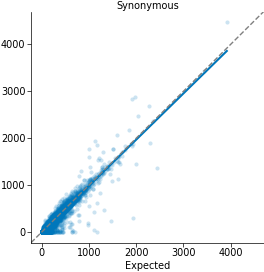

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
plot_oe(oe, ax, csq="synonymous")